Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 2

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_






### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [0]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module2')

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 85, done.
remote: Total 85 (delta 0), reused 0 (delta 0), pack-reused 85
Unpacking objects: 100% (85/85), done.
From https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> origin/master
     |████████████████████████████████| 92kB 5.6MB/s 
     |████████████████████████████████| 112kB 17.7MB/s 
     |████████████████████████████████| 133kB 40.7MB/s 
     |████████████████████████████████| 57.7MB 256kB/s 
     |████████████████████████████████| 245kB 47.7MB/s 
     |████████████████████████████████| 614kB 48.6MB/s 
     |████████████████████████████████| 225kB 48.1MB/s 
     |████████████████████████████████| 307kB 42.5MB/s 
     |████████████████████████████████| 51kB 19.3MB/s 
     |████████████████████████████████| 194kB 47.6MB/s 
     |████████████████████████████████| 727kB 42.8MB/s 
     |██████████████████████████████

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))
# Read test_features.csv & sample_submission.csv
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

## Train, Test, Val Split.

In [0]:
# split data into train, val.
train, val = train_test_split(train, train_size=0.80, test_size=0.20,
                              stratify=train['status_group'], random_state=42)
# show the data frames shapes.
train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

## Create Wrangle Function.

In [0]:
import numpy as np
from datetime import datetime

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""   
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['longitude', 'latitude', 'construction_year', 'population']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)

    # create buckets.
    # lga.
    bucket = X['lga'].value_counts()[:20].index
    X.loc[~X['lga'].isin(bucket), 'lga'] = 'Other'
    # ward.
    bucket = X['ward'].value_counts()[:20].index
    X.loc[~X['ward'].isin(bucket), 'ward'] = 'Other'
    # subvillage.
    bucket = X['subvillage'].value_counts()[:100].index
    X.loc[~X['subvillage'].isin(bucket), 'subvillage'] = 'Other'
    # funder.
    bucket = X['funder'].value_counts()[:20].index
    X.loc[~X['funder'].isin(bucket), 'funder'] = 'Other'
    # installer.
    bucket = X['installer'].value_counts()[:20].index
    X.loc[~X['installer'].isin(bucket), 'installer'] = 'Other'


    # use datetime.strptime and split date_recorded into year, month, day columns.
    year = lambda x: datetime.strptime(x, "%Y-%m-%d" ).year
    X['year'] = X['date_recorded'].map(year)
    month = lambda x: datetime.strptime(x, "%Y-%m-%d" ).month
    X['month'] = X['date_recorded'].map(month)
    day = lambda x: datetime.strptime(x, "%Y-%m-%d" ).day
    X['day'] = X['date_recorded'].map(day)

    # remove duplicates/bad columns.
    X = X.drop(columns=['date_recorded', 'quantity_group', 'quality_group', 'waterpoint_type_group', 'extraction_type_group', 'payment_type', 'num_private'])

    # Engineer feature: how many years from construction_year to date_recorded
    X['years_missing'] = X['year'] - X['construction_year']
    # Create new feature pump_age.
    X['pump_age'] = 2013 - X['construction_year']
    X.loc[X['pump_age'] == 2013, 'pump_age'] = 0
    X.loc[X['pump_age'] == 0, 'pump_age'] = 10
    
    # return the wrangled dataframe
    return X


# use the wrange function on the tran, val, test data.
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

## Set the Target and Train, Test, Val.

In [0]:
# Arrange data into X features matrix and y target vector
target = 'status_group'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

## Random Forest Classifier Model + OrdinalEncoder.

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
   ce.OrdinalEncoder(),
   SimpleImputer(strategy='median'),
   StandardScaler(),
   RandomForestClassifier(max_features=14, max_depth=17, min_samples_leaf=2, min_samples_split=14, n_estimators=100, random_state=42,  n_jobs=-1) 
)

pipeline.fit(X_train, y_train)
print ('Training Accuracy', pipeline.score(X_train, y_train))
print ('Validation Accuracy', pipeline.score(X_val, y_val))
y_pred = pipeline.predict(X_test)

Training Accuracy 0.871506734006734
Validation Accuracy 0.8053872053872054


## Bar Plot the Feature Importances.

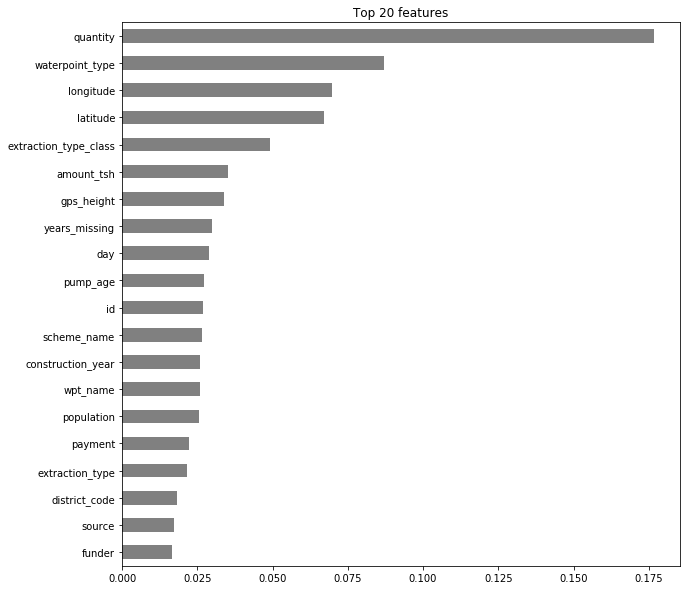

In [0]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

## Create the data frame file for download.

In [0]:
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-01.csv', index=False)

In [0]:
!head submission-01.csv

id,status_group
50785,functional
51630,functional
17168,functional
45559,non functional
49871,functional
52449,functional
24806,functional
28965,non functional
36301,non functional


In [0]:
from google.colab import files 
files.download('submission-01.csv')

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
encoder = dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categorcals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

In [0]:
for min_samples_leaf in [1, 10, 100, 1000]:
    for smoothing in [1, 10, 100, 1000]:
        print(f'TargetEncoder(min_samples_leaf={min_samples_leaf}, smoothing={smoothing})')
        encoder = ce.TargetEncoder(min_samples_leaf=min_samples_leaf, smoothing=smoothing)
        X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
        X_val_encoded = encoder.transform(X_val, y_val=='functional')

        pipeline = make_pipeline(
            SimpleImputer(strategy='median'), 
            RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
        )

        pipeline.fit(X_train_encoded, y_train)
        print('Validation Accuracy', pipeline.score(X_val_encoded, y_val), '\n')

TargetEncoder(min_samples_leaf=1, smoothing=1)
Validation Accuracy 0.8035353535353535 

TargetEncoder(min_samples_leaf=1, smoothing=10)
Validation Accuracy 0.804040404040404 

TargetEncoder(min_samples_leaf=1, smoothing=100)
Validation Accuracy 0.8035353535353535 

TargetEncoder(min_samples_leaf=1, smoothing=1000)
Validation Accuracy 0.805050505050505 

TargetEncoder(min_samples_leaf=10, smoothing=1)
Validation Accuracy 0.806060606060606 

TargetEncoder(min_samples_leaf=10, smoothing=10)
Validation Accuracy 0.80496632996633 

TargetEncoder(min_samples_leaf=10, smoothing=100)
Validation Accuracy 0.8047979797979798 

TargetEncoder(min_samples_leaf=10, smoothing=1000)
Validation Accuracy 0.8013468013468014 

TargetEncoder(min_samples_leaf=100, smoothing=1)
Validation Accuracy 0.810942760942761 

TargetEncoder(min_samples_leaf=100, smoothing=10)
Validation Accuracy 0.8047138047138047 

TargetEncoder(min_samples_leaf=100, smoothing=100)
Validation Accuracy 0.8037878787878788 

TargetEncoder

/usr/local/lib/python3.6/dist-packages/category_encoders/target_encoder.py:170: RuntimeWarning: overflow encountered in exp
  smoove = 1 / (1 + np.exp(-(stats['count'] - self.min_samples_leaf) / self.smoothing))


Validation Accuracy 0.811026936026936 

TargetEncoder(min_samples_leaf=1000, smoothing=10)
Validation Accuracy 0.8106060606060606 

TargetEncoder(min_samples_leaf=1000, smoothing=100)
Validation Accuracy 0.8074915824915825 

TargetEncoder(min_samples_leaf=1000, smoothing=1000)
Validation Accuracy 0.805050505050505 

